# Analysis of reservoirs

## Internal states

Running Reservoir-2: 100%|██████████| 100/100 [00:00<00:00, 27014.71it/s]


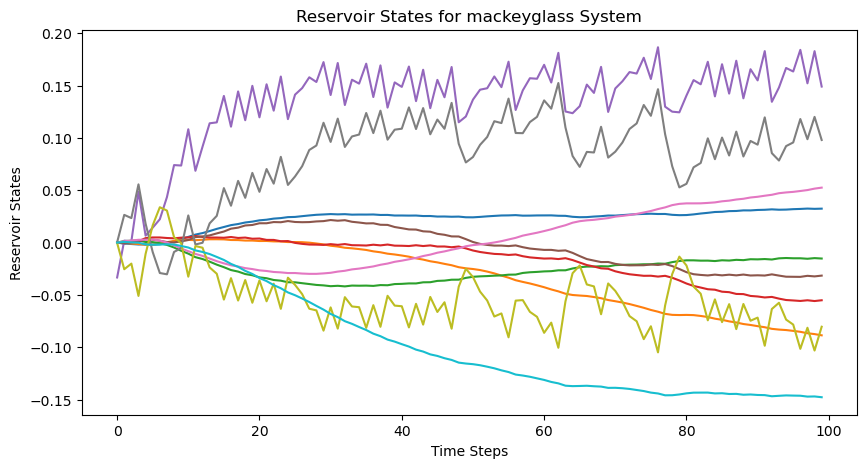

In [3]:
import numpy as np
from rcpy.data import load_data_rcpy, preprocess_data_rcpy
from reservoirpy.nodes import Reservoir
import matplotlib.pyplot as plt

system = 'mackeyglass' # 'enso', 'mackeyglass', 'mackeyglass_noisy', 'random'
data_file = f'../../master-thesis/DATA/data_generated/ts_henon_10000.csv'
data_raw = load_data_rcpy(data_file=data_file)
data = preprocess_data_rcpy(data_raw, train_length=500)

reservoir_units = 200
leak_rate = 0.1
spectral_radius = 0.99
input_scaling = 0.35
p = 0.1
seed = np.random.randint(0, 1_000_000)

params = {
    "reservoir_units": reservoir_units,
    "p": p,
    "leak_rate": leak_rate,
    "spectral_radius": spectral_radius,
    "input_scaling": input_scaling,
    "alpha": None,
    "seed": seed
}

reservoir = Reservoir(
    units=params['reservoir_units'],
    sr=params['spectral_radius'],
    rc_connectivity=params['p'],
    lr=params['leak_rate'],
    input_scaling=params['input_scaling'],
    seed=seed,
    input_bias=False
)

states = reservoir.run(
    data['train_data'][:100], reset=True
)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.plot(states[:, i], label=f'Unit {i+1}')
plt.title(f'Reservoir States for {system} System')
plt.xlabel('Time Steps')
plt.ylabel('Reservoir States')
plt.show()

## Distances between internal states: Auxiliary method

In [ ]:
import numpy as np
from rcpy.data import load_data_rcpy
from rcpy.analysis import compute_distances, compute_transient_times

system = 'mackeyglass' # 'enso', 'mackeyglass', 'mackeyglass_noisy', 'random'
data_file = f'../../master-thesis/DATA/data_generated/ts_henon_10000.csv'
data_raw = load_data_rcpy(data_file=data_file)

reservoir_units = 200
leak_rate = 0.5
spectral_radius = 0.99
input_scaling = 0.35
p = 0.1
seed = np.random.randint(0, 1_000_000)

model_config = {
    "reservoir_units": reservoir_units,
    "p": p,
    "leak_rate": leak_rate,
    "spectral_radius": spectral_radius,
    "input_scaling": input_scaling,
    "alpha": None,
    "seed": seed
}

num_states = 500
test_length = 250
error_threshold = 0.01

distances = compute_distances(
    params=model_config,
    num_states=num_states,
    input_data=data_raw,
    test_length=test_length
)

transient_times = compute_transient_times(distances, error_threshold)

Running Reservoir-9: 100%|██████████| 250/250 [00:00<00:00, 31802.98it/s]


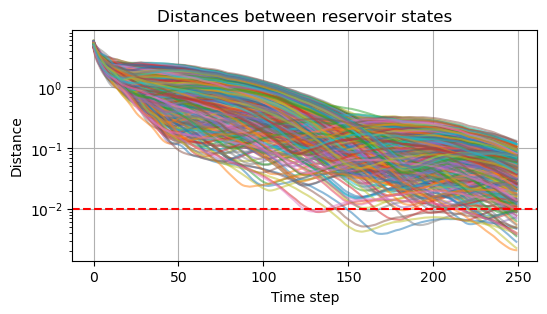

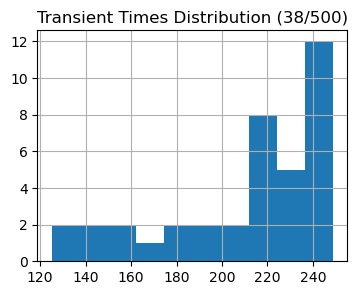

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 3))
plt.plot(distances.T, alpha=0.5)
plt.axhline(y=error_threshold, color='r', linestyle='--', label='Error Threshold')
plt.yscale('log')
plt.xlabel('Time step')
plt.ylabel('Distance')
plt.grid(True)
plt.title('Distances between reservoir states')
plt.show()

plt.figure(figsize=(4, 3))
plt.hist(transient_times)
#plt.axhline(y=0, color='red', linestyle='--', label='Error Threshold')
#plt.yscale('log')
plt.title(f'Transient Times Distribution ({np.count_nonzero(~np.isnan(transient_times))}/{num_states})')
plt.grid(True)
plt.show()
